In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Create the image prediction folder

In [3]:
folder_name = 'image_prediction'

In [4]:
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)

In [7]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [7]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

#### check folder's content

In [8]:
os.listdir(folder_name)

[]

In [9]:
image_data = pd.read_csv('image-predictions.tsv', sep = '\t')

The image_data above is our first dataframe 

In [10]:
image_data

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [11]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
data = pd.read_csv('twitter-archive-enhanced.csv')

In [29]:
data

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

The twitter-archive-enhanced.csv dataset above named data is our second dataset

In [14]:
tweet_ids = data.tweet_id.values
len(tweet_ids)

2356

#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [15]:

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [16]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [17]:
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets = {'tweet_id': data['id'],
                 'retweet_count': data['retweet_count'],
                 'favorite_count': data['favorite_count']}
        df_list.append(tweets)

df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


The Twitter API dataframe above named df is our third dataset

In [18]:
df.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           6968           33673
1  892177421306343426           5272           29207
2  891815181378084864           3464           21970
3  891689557279858688           7191           36773
4  891327558926688256           7715           35178

In [19]:
df.shape

(2327, 3)

## DATA ASSESSMENT

#### Assessing the Image Prediction dataset

In [20]:
image_data

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

The above information shows that the dataframe contains 2075 rows and 12 columns

In [21]:
image_data.shape

(2075, 12)

In [22]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The image_data.info gives a brief information on the image prediction dataset.

In [23]:
image_data.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

The above table gives the summary statistics of the image_data dataframe

In [24]:
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
image_data.duplicated().sum()

0

The above function shows that there are no duplicate records in the dataframe.

#### Assessing the Twitter Archive dataset

In [30]:
data

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

This shows that the Twitter archive dataset has 2356 rows and 17 columns

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The data.info shows that there are missing records in the dataframe

In [32]:
data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

The above shows us the summary statistics of the dataframe

In [33]:
data.duplicated().sum()

0

The data.duplicated shows that there are no duplicated records in the dataframe

In [34]:
data.shape

(2356, 17)

In [35]:
data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Assessing the Twitter API Dataframe

In [36]:
df

tweet_id  retweet_count  favorite_count
0     892420643555336193           6968           33673
1     892177421306343426           5272           29207
2     891815181378084864           3464           21970
3     891689557279858688           7191           36773
4     891327558926688256           7715           35178
...                  ...            ...             ...
2322  666049248165822465             36              88
2323  666044226329800704            115             246
2324  666033412701032449             36             100
2325  666029285002620928             39             112
2326  666020888022790149            419            2283

[2327 rows x 3 columns]

This shows that the dataframe has 2327 rows and 3 columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


This shows that there are no missing records in the dataframe

In [38]:
df.describe()

tweet_id  retweet_count  favorite_count
count  2.327000e+03    2327.000000     2327.000000
mean   7.417930e+17    2458.463687     7023.450795
std    6.820795e+16    4163.205486    10913.681798
min    6.660209e+17       1.000000        0.000000
25%    6.781394e+17     492.500000     1221.000000
50%    7.178418e+17    1144.000000     3034.000000
75%    7.986547e+17    2844.500000     8564.500000
max    8.924206e+17   70327.000000   144128.000000

This gives us the summary statistics of the dateframe

In [39]:
df.duplicated().sum()

0

This shows that there are no duplicate records in the dataframe

### QUALITY ISSUES 

### QUALITY 

#### TWITTER ARCVIVED DATASET


- Tweet_id has datatype int64 instead of object
- Some rows have retweet value
- expanded_urls column has rows with missing records
- Expanded_urls column has rows with repeated links
- Timestamp column has incorrect data type int instead of datetime
- Timestamp has +0000 which is not relevant
- columns in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id not needed


#### IMAGE PREDICTION DATASET

- tweet_id has datatype int64 instead of object



#### TWITTER API DATASET

- tweet_id has datatype int64 instead of object

#### main_data (i.e., the merged dataset)

- JPG_URL and IMG_NUM has rows with missing record

### TIDINESS 

#### TWITTER ARCVIVE DATASET

- dog stages doggo, floofer, pupper, puppo should form a single column
- Extract month and year columns from the timestamp column
- The three dataframes should be merged to a single dataframe 

#### IMAGE PREDICTION DATASET

- The columns p1, p2, p3 should form a single column and columns p1_conf, p2_conf, p3_conf should also form single column.



# DATA CLEANING

### CREATING A COPY OF THE DATASETS 

In [40]:
data_copy = data.copy()
image_data_copy = image_data.copy()
df_copy = df.copy()

## Tidiness

####  Twitter Archive Dataset - Dog stages doggo, floofer, pupper, puppo in different columns. They should form a single column

##### Define

Apply the `pd.melt` function to the doggo, floofer, pupper and puppo columns, and then remove the duplicated tweet_ids.



##### Code

In [41]:
data_copy = pd.melt(data_copy, id_vars=['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id','timestamp', 'source', 'text', 'retweeted_status_id','retweeted_status_user_id',
                                        'retweeted_status_timestamp', 'expanded_urls','rating_numerator', 'rating_denominator', 'name' ], var_name ='breed', value_name = 'dog_stages' )





##### Test

In [42]:
data_copy

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
9419  666049248165822465                    NaN                  NaN   
9420  666044226329800704                    NaN                  NaN   
9421  666033412701032449                    NaN                  NaN   
9422  666029285002620928                    NaN                  NaN   
9423  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
9419  2015-11-16 00:24:50 +0000   
9420  2015-11-16 00:04:52 +0000   
9421  2015-11-15 23:21:54 +0000   
9422  2015-11-15 23:05:30 +0000   
9423  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
9419  <a href="http://twitter.com/download/iphone" r...   
9420  <a href="http://twitter.com/download/iphone" r...   
9421  <a href="http://twitter.com/download/iphone" r...   
9422  <a href="http://twitter.com/download/iphone" r...   
9423  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
9419  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
9420  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
9421  Here is a very happy pup. Big fan of well-main...                  NaN   
9422  This is a western brown Mitsubishi terrier. Up...                  NaN   
9423  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
9419                       NaN                        NaN   
9420                       NaN                        NaN   
9421                       NaN                        NaN   
9422                       NaN                        NaN   
9423                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

check and drop the duplicated tweet_ids



##### Code

In [43]:
data_copy['tweet_id'].duplicated().sum()


7068

In [44]:
data_copy = data_copy.drop_duplicates(subset = ['tweet_id'], keep = 'first')





##### Test

In [45]:
data_copy.shape

(2356, 15)

####  The columns of the three tables should be merged to one table.

##### Define

Merge the columns of the Twitter archive table to the Twitter API table, joining on tweet_id

##### Code

In [46]:
new_data = pd.merge(df_copy, data_copy, on=['tweet_id'], how='left')

##### Test

In [47]:
new_data.head()

tweet_id  retweet_count  favorite_count  in_reply_to_status_id  \
0  892420643555336193           6968           33673                    NaN   
1  892177421306343426           5272           29207                    NaN   
2  891815181378084864           3464           21970                    NaN   
3  891689557279858688           7191           36773                    NaN   
4  891327558926688256           7715           35178                    NaN   

   in_reply_to_user_id                  timestamp  \
0                  NaN  2017-08-01 16:23:56 +0000   
1                  NaN  2017-08-01 00:17:27 +0000   
2                  NaN  2017-07-31 00:18:03 +0000   
3                  NaN  2017-07-30 15:58:51 +0000   
4                  NaN  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  breed dog_stages  
0                  10   Phineas  doggo       None  
1                  10     Tilly  doggo       None  
2                  10    Archie  doggo       None  
3                  10     Darla  doggo       None  
4                  10  Franklin  doggo       None

In [48]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2327 non-null   int64  
 1   retweet_count               2327 non-null   int64  
 2   favorite_count              2327 non-null   int64  
 3   in_reply_to_status_id       78 non-null     float64
 4   in_reply_to_user_id         78 non-null     float64
 5   timestamp                   2327 non-null   object 
 6   source                      2327 non-null   object 
 7   text                        2327 non-null   object 
 8   retweeted_status_id         160 non-null    float64
 9   retweeted_status_user_id    160 non-null    float64
 10  retweeted_status_timestamp  160 non-null    object 
 11  expanded_urls               2269 non-null   object 
 12  rating_numerator            2327 non-null   int64  
 13  rating_denominator          2327 

##### Define

Merge the columns of the Image prediction table to the New_data table, joining on tweet_id

#### Code

In [49]:
main_data = pd.merge(new_data, image_data, on=['tweet_id'], how='left')

##### Test

In [50]:
main_data.head()

tweet_id  retweet_count  favorite_count  in_reply_to_status_id  \
0  892420643555336193           6968           33673                    NaN   
1  892177421306343426           5272           29207                    NaN   
2  891815181378084864           3464           21970                    NaN   
3  891689557279858688           7191           36773                    NaN   
4  891327558926688256           7715           35178                    NaN   

   in_reply_to_user_id                  timestamp  \
0                  NaN  2017-08-01 16:23:56 +0000   
1                  NaN  2017-08-01 00:17:27 +0000   
2                  NaN  2017-07-31 00:18:03 +0000   
3                  NaN  2017-07-30 15:58:51 +0000   
4                  NaN  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id  ... img_num           p1   p1_conf  p1_dog  \
0                       NaN  ...     1.0       orange  0.097049   False   
1                       NaN  ...     1.0    Chihuahua  0.323581    True   
2                       NaN  ...     1.0    Chihuahua  0.716012    True   
3                       NaN  ...     1.0  paper_towel  0.170278   False   
4                       NaN  ...     2.0       basset  0.555712    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  
0  False  
1   True  
2   True  
3  False  
4   True  

[5 rows x 28 columns]

In [51]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2327 non-null   int64  
 1   retweet_count               2327 non-null   int64  
 2   favorite_count              2327 non-null   int64  
 3   in_reply_to_status_id       78 non-null     float64
 4   in_reply_to_user_id         78 non-null     float64
 5   timestamp                   2327 non-null   object 
 6   source                      2327 non-null   object 
 7   text                        2327 non-null   object 
 8   retweeted_status_id         160 non-null    float64
 9   retweeted_status_user_id    160 non-null    float64
 10  retweeted_status_timestamp  160 non-null    object 
 11  expanded_urls               2269 non-null   object 
 12  rating_numerator            2327 non-null   int64  
 13  rating_denominator          2327 

####  The columns p1, p2, p3 should form a single column and columns p1_conf, p2_conf, p3_conf should form single column.

##### Define

Apply the if function to select the appropriate result for each row and then return the results in a new column

##### Code

In [52]:
dog_breed = []
conf_level = []

def image(main_data):
    if main_data['p1_dog'] == True:
        dog_breed.append(main_data['p1'])
        conf_level.append(main_data['p1_conf'])
    elif main_data['p2_dog'] == True:
        dog_breed.append(main_data['p2'])
        conf_level.append(main_data['p2_conf'])
    elif main_data['p3_dog'] == True:
        dog_breed.append(main_data['p3'])
        conf_level.append(main_data['p3_conf'])
    else:
        dog_breed.append('Wrong prediction')
        conf_level.append('Wrong prediction')
        
main_data.apply(image, axis = 1)

# create new columns
main_data['dog_breed'] = dog_breed
main_data['conf_level'] = conf_level

##### Test

In [53]:
main_data.head()

tweet_id  retweet_count  favorite_count  in_reply_to_status_id  \
0  892420643555336193           6968           33673                    NaN   
1  892177421306343426           5272           29207                    NaN   
2  891815181378084864           3464           21970                    NaN   
3  891689557279858688           7191           36773                    NaN   
4  891327558926688256           7715           35178                    NaN   

   in_reply_to_user_id                  timestamp  \
0                  NaN  2017-08-01 16:23:56 +0000   
1                  NaN  2017-08-01 00:17:27 +0000   
2                  NaN  2017-07-31 00:18:03 +0000   
3                  NaN  2017-07-30 15:58:51 +0000   
4                  NaN  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id  ...   p1_conf p1_dog                  p2  \
0                       NaN  ...  0.097049  False               bagel   
1                       NaN  ...  0.323581   True            Pekinese   
2                       NaN  ...  0.716012   True            malamute   
3                       NaN  ...  0.170278  False  Labrador_retriever   
4                       NaN  ...  0.555712   True    English_springer   

    p2_conf p2_dog                           p3   p3_conf p3_dog  \
0  0.085851  False                       banana  0.076110  False   
1  0.090647   True                     papillon  0.068957   True   
2  0.078253   True                       kelpie  0.031379   True   
3  0.168086   True                      spatula  0.040836  False   
4  0.225770   True  German_short-haired_pointer  0.175219   True   

            dog_breed        conf_level  
0    Wrong prediction  Wrong prediction  
1           Chihuahua          0.323581  
2           Chihuahua          0.716012  
3  Labrador_retriever          0.168086  
4              basset          0.555712  

[5 rows x 30 columns]

## QUALITY

#### 1. Timestamp has +0000 included in all records

###### Define

remove +0000 from all timestamp records using string slicing

##### Code

In [54]:
main_data['timestamp'] = main_data['timestamp'].str[:19]

##### Test

In [55]:
main_data.head()

tweet_id  retweet_count  favorite_count  in_reply_to_status_id  \
0  892420643555336193           6968           33673                    NaN   
1  892177421306343426           5272           29207                    NaN   
2  891815181378084864           3464           21970                    NaN   
3  891689557279858688           7191           36773                    NaN   
4  891327558926688256           7715           35178                    NaN   

   in_reply_to_user_id            timestamp  \
0                  NaN  2017-08-01 16:23:56   
1                  NaN  2017-08-01 00:17:27   
2                  NaN  2017-07-31 00:18:03   
3                  NaN  2017-07-30 15:58:51   
4                  NaN  2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id  ...   p1_conf p1_dog                  p2  \
0                       NaN  ...  0.097049  False               bagel   
1                       NaN  ...  0.323581   True            Pekinese   
2                       NaN  ...  0.716012   True            malamute   
3                       NaN  ...  0.170278  False  Labrador_retriever   
4                       NaN  ...  0.555712   True    English_springer   

    p2_conf p2_dog                           p3   p3_conf p3_dog  \
0  0.085851  False                       banana  0.076110  False   
1  0.090647   True                     papillon  0.068957   True   
2  0.078253   True                       kelpie  0.031379   True   
3  0.168086   True                      spatula  0.040836  False   
4  0.225770   True  German_short-haired_pointer  0.175219   True   

            dog_breed        conf_level  
0    Wrong prediction  Wrong prediction  
1           Chihuahua          0.323581  
2           Chihuahua          0.716012  
3  Labrador_retriever          0.168086  
4              basset          0.555712  

[5 rows x 30 columns]

#### 2. Erroneous datatype

##### Define

Convert the timestamp column's datatype from string to a datetime using `pd.to_datetime`

##### Code

In [56]:
main_data['timestamp'] = pd.to_datetime(main_data['timestamp'])

##### 3. Define

Convert the tweet_id column's datatype from int to a string using `astype`

##### Code

In [57]:
main_data['tweet_id'] = main_data['tweet_id'].astype(str)

##### Test

In [58]:
main_data.head()

tweet_id  retweet_count  favorite_count  in_reply_to_status_id  \
0  892420643555336193           6968           33673                    NaN   
1  892177421306343426           5272           29207                    NaN   
2  891815181378084864           3464           21970                    NaN   
3  891689557279858688           7191           36773                    NaN   
4  891327558926688256           7715           35178                    NaN   

   in_reply_to_user_id           timestamp  \
0                  NaN 2017-08-01 16:23:56   
1                  NaN 2017-08-01 00:17:27   
2                  NaN 2017-07-31 00:18:03   
3                  NaN 2017-07-30 15:58:51   
4                  NaN 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id  ...   p1_conf p1_dog                  p2  \
0                       NaN  ...  0.097049  False               bagel   
1                       NaN  ...  0.323581   True            Pekinese   
2                       NaN  ...  0.716012   True            malamute   
3                       NaN  ...  0.170278  False  Labrador_retriever   
4                       NaN  ...  0.555712   True    English_springer   

    p2_conf p2_dog                           p3   p3_conf p3_dog  \
0  0.085851  False                       banana  0.076110  False   
1  0.090647   True                     papillon  0.068957   True   
2  0.078253   True                       kelpie  0.031379   True   
3  0.168086   True                      spatula  0.040836  False   
4  0.225770   True  German_short-haired_pointer  0.175219   True   

            dog_breed        conf_level  
0    Wrong prediction  Wrong prediction  
1           Chihuahua          0.323581  
2           Chihuahua          0.716012  
3  Labrador_retriever          0.168086  
4              basset          0.555712  

[5 rows x 30 columns]

#### 4. REMOVE ALL ROWS WITH RETWEET RECORDS

##### Define

drop all rows that has record in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.
We first convert the datatype of the columns from float to string so as to enable string search.

##### Code

In [59]:
main_data['retweeted_status_id'] = main_data['retweeted_status_id'].astype(str)
main_data['retweeted_status_user_id'] = main_data['retweeted_status_user_id'].astype(str)

Now, we drop all rows with retweet records

In [60]:
main_data = main_data[~(((main_data['retweeted_status_id'] != 'NaN') & (main_data['retweeted_status_id'] != 'nan')) | ((main_data['retweeted_status_user_id'] != 'nan')&(main_data['retweeted_status_user_id'] != 'NaN')))]


##### Test

In [61]:

data_without_retweet = main_data[(((main_data['retweeted_status_id'] != 'NaN') & (main_data['retweeted_status_id'] != 'nan')) | ((main_data['retweeted_status_user_id'] != 'nan')&(main_data['retweeted_status_user_id'] != 'NaN')))]
data_without_retweet

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, breed, dog_stages, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, dog_breed, conf_level]
Index: []

[0 rows x 30 columns]

This shows that we have successfully removed all rows with retweet record.

In [62]:
main_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'breed', 'dog_stages', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'dog_breed', 'conf_level'],
      dtype='object')

#### 5. Columns retweeted_status_id, retweeted_status_user_id, breed, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, breed,  p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog are not neeeded

##### Define

drop the columns using the `drop()`.

##### Code

In [63]:
main_data.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                          'in_reply_to_status_id', 'in_reply_to_user_id', 'breed', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

##### Test

In [64]:
main_data.head()

tweet_id  retweet_count  favorite_count           timestamp  \
0  892420643555336193           6968           33673 2017-08-01 16:23:56   
1  892177421306343426           5272           29207 2017-08-01 00:17:27   
2  891815181378084864           3464           21970 2017-07-31 00:18:03   
3  891689557279858688           7191           36773 2017-07-30 15:58:51   
4  891327558926688256           7715           35178 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   Phineas       None   
1                  10     Tilly       None   
2                  10    Archie       None   
3                  10     Darla       None   
4                  10  Franklin       None   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

            dog_breed        conf_level  
0    Wrong prediction  Wrong prediction  
1           Chihuahua          0.323581  
2           Chihuahua          0.716012  
3  Labrador_retriever          0.168086  
4              basset          0.555712

In [65]:
main_data.shape

(2167, 15)

#### 6. Expanded_urls column has rows with missing records


##### Define

Drop the rows with missing expanded_url records

##### Code

In [66]:
main_data['expanded_urls'].isna().sum()

58

In [67]:
main_data = main_data[~main_data['expanded_urls'].isna()]

##### Test

In [68]:
main_data.shape

(2109, 15)

In [69]:
main_data.isna().sum()

tweet_id                0
retweet_count           0
favorite_count          0
timestamp               0
source                  0
text                    0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                    0
dog_stages              0
jpg_url               123
img_num               123
dog_breed               0
conf_level              0
dtype: int64

#### 7. JPG_URL has rows with missing record

##### Define

Remove all rows with missing jpg_url record

##### Code

In [70]:
main_data = main_data[~main_data['jpg_url'].isnull()]


##### Test

In [71]:
main_data.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stages            0
jpg_url               0
img_num               0
dog_breed             0
conf_level            0
dtype: int64

#### 8. Expanded_urls column has rows has repeated records

##### Define

Remove all repeated link records using the string slicing method

##### Code

In [72]:
main_data['expanded_urls'] = main_data['expanded_urls'].str[:63]

##### Test

In [73]:
main_data['expanded_urls'].values

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

## Tidiness (Cont'd)

##### Define

Extract the month and year columns from the timestamp column using `datetime` function.

##### Code

In [74]:
main_data['year'] = main_data['timestamp'].dt.year
main_data['month'] = main_data['timestamp'].dt.month

##### Test

In [75]:
main_data.head()

tweet_id  retweet_count  favorite_count           timestamp  \
0  892420643555336193           6968           33673 2017-08-01 16:23:56   
1  892177421306343426           5272           29207 2017-08-01 00:17:27   
2  891815181378084864           3464           21970 2017-07-31 00:18:03   
3  891689557279858688           7191           36773 2017-07-30 15:58:51   
4  891327558926688256           7715           35178 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   Phineas       None   
1                  10     Tilly       None   
2                  10    Archie       None   
3                  10     Darla       None   
4                  10  Franklin       None   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   

            dog_breed        conf_level  year  month  
0    Wrong prediction  Wrong prediction  2017      8  
1           Chihuahua          0.323581  2017      8  
2           Chihuahua          0.716012  2017      7  
3  Labrador_retriever          0.168086  2017      7  
4              basset          0.555712  2017      7

In [76]:
main_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stages', 'jpg_url', 'img_num', 'dog_breed', 'conf_level',
       'year', 'month'],
      dtype='object')

In [77]:
main_data.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stages            0
jpg_url               0
img_num               0
dog_breed             0
conf_level            0
year                  0
month                 0
dtype: int64

In [133]:
main_data.shape

(1986, 17)

##### Save the dataset

In [78]:
main_data.to_csv('twitter_archive_master.csv')

## INSIGHTS

##### 1. WHAT PERCENTAGE OF THE DATA HAS WRONG IMAGE PREDICTION?

In [79]:
wrong_prediction = main_data[main_data['dog_breed'] == 'Wrong prediction']
correct_prediction = main_data[main_data['dog_breed'] != 'Wrong prediction']
percentage_of_wrong_prediction = (len(wrong_prediction)/(len(wrong_prediction) + len(correct_prediction)))*100

percentage_of_wrong_prediction = np.round(percentage_of_wrong_prediction, decimals = 2)

print('The percentage of wrong prediction is', percentage_of_wrong_prediction, '%.')

The percentage of wrong prediction is 15.51 %.


From the above insight, it was observed that 15.51% of the dataset have wrong image prediction.

##### WHAT PERCENTAGE OF THE DATA HAS CORRECT IMAGE PREDICTION?

In [80]:
wrong_prediction = main_data[main_data['dog_breed'] == 'Wrong prediction']
correct_prediction = main_data[main_data['dog_breed'] != 'Wrong prediction']
percentage_of_correct_prediction = (len(correct_prediction)/(len(wrong_prediction) + len(correct_prediction)))*100

percentage_of_correct_prediction = np.round(percentage_of_correct_prediction, decimals = 2)

print('The percentage of correct prediction is', percentage_of_correct_prediction, '%.')

The percentage of correct prediction is 84.49 %.


From the above insight, it was observed that 84.49% of the dataset have correct image prediction.

#### 2. In what year did we record the highest number of tweet?

In [81]:
tweets_per_year = main_data['year'].value_counts()
tweets_per_year

2016    971
2015    662
2017    353
Name: year, dtype: int64

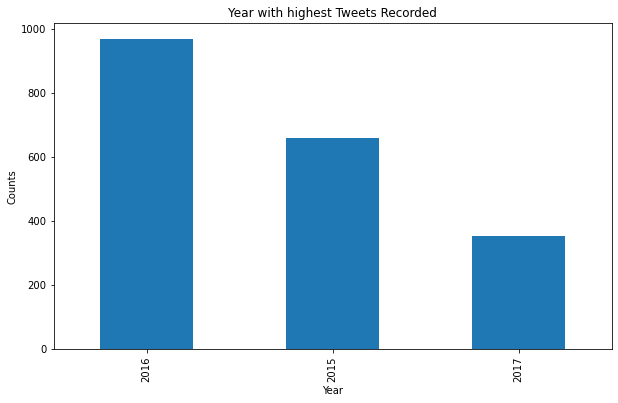

In [82]:
tweets_per_year = main_data['year'].value_counts()
tweets_per_year.plot.bar(figsize = (10,6))

tweets_per_year.plot.bar(x = 'Year', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Year with highest Tweets Recorded')
plt.show()

From the above insight and visualization, it was observed that the year with highest record of tweet is 2016.

#### 3. Tweet_Id with highest favorite count

In [83]:
main_data.nlargest(1, columns = 'favorite_count', keep = 'first')

tweet_id  retweet_count  favorite_count           timestamp  \
1011  744234799360020481          70327          144128 2016-06-18 18:26:18   

                                                 source  \
1011  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1011  Here's a doggo realizing you can stand in a po...   

                                          expanded_urls  rating_numerator  \
1011  https://twitter.com/dog_rates/status/744234799...                13   

      rating_denominator  name dog_stages  \
1011                  10  None      doggo   

                                                jpg_url  img_num  \
1011  https://pbs.twimg.com/ext_tw_video_thumb/74423...      1.0   

               dog_breed conf_level  year  month  
1011  Labrador_retriever   0.825333  2016      6

From the insight above, it was observed that the tweet_id with highest favorite count is 744234799360030481. The tweet_id has 144,235 favorite counts.

#### Tweet_Id with least favorite count

In [84]:
main_data.nsmallest(1, columns = 'favorite_count', keep = 'first')

tweet_id  retweet_count  favorite_count           timestamp  \
2310  666102155909144576             11              66 2015-11-16 03:55:04   

                                                 source  \
2310  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2310  Oh my. Here you are seeing an Adobe Setter giv...   

                                          expanded_urls  rating_numerator  \
2310  https://twitter.com/dog_rates/status/666102155...                11   

      rating_denominator  name dog_stages  \
2310                  10  None       None   

                                              jpg_url  img_num  \
2310  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg      1.0   

           dog_breed conf_level  year  month  
2310  English_setter   0.298617  2015     11

From the insight above, it was observed that the tweet_id withthe least favorite count is 666102155909144576. The tweet_id has 66 favorite counts.

#### 4. Tweet_id with highest rating_numerator 

In [85]:
main_data.nlargest(1, columns = 'rating_numerator', keep = 'first')

tweet_id  retweet_count  favorite_count           timestamp  \
951  749981277374128128           2269            4767 2016-07-04 15:00:45   

                                                source  \
951  <a href="https://about.twitter.com/products/tw...   

                                                  text  \
951  This is Atticus. He's quite simply America af....   

                                         expanded_urls  rating_numerator  \
951  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name dog_stages  \
951                  10  Atticus       None   

                                             jpg_url  img_num  \
951  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg      1.0   

            dog_breed        conf_level  year  month  
951  Wrong prediction  Wrong prediction  2016      7

From the insight above, it was observed that the tweet_id with highest rating numerator is 749981277374128128. The numerator rating is 1776.

In [86]:
main_data[main_data['rating_numerator'] == 0]

tweet_id  retweet_count  favorite_count           timestamp  \
299  835152434251116546           2755           20875 2017-02-24 15:40:31   
988  746906459439529985            269            2710 2016-06-26 03:22:31   

                                                source  \
299  <a href="http://twitter.com/download/iphone" r...   
988  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
299  When you're so blinded by your systematic plag...   
988  PUPDATE: can't see any. Even if I could, I cou...   

                                         expanded_urls  rating_numerator  \
299  https://twitter.com/dog_rates/status/835152434...                 0   
988  https://twitter.com/dog_rates/status/746906459...                 0   

     rating_denominator  name dog_stages  \
299                  10  None       None   
988                  10  None       None   

                                             jpg_url  img_num  \
299  https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg      3.0   
988  https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg      1.0   

                          dog_breed        conf_level  year  month  
299  American_Staffordshire_terrier          0.012731  2017      2  
988                Wrong prediction  Wrong prediction  2016      6

This shows that we have two tweet_ids with 0 rating_numerator.